In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath("../src"))

from load_data import load_clinical_data
# Load clean data
df = load_clinical_data("../data/raw/Clinical_and_Other_Features.xlsx")




In [126]:
# Quick look
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient Information                         922 non-null    object 
 1   MRI Technical Information                   922 non-null    object 
 2   Unnamed: 2                                  922 non-null    object 
 3   Unnamed: 3                                  922 non-null    object 
 4   Unnamed: 4                                  922 non-null    object 
 5   Unnamed: 5                                  922 non-null    object 
 6   Unnamed: 6                                  922 non-null    object 
 7   Unnamed: 7                                  922 non-null    object 
 8   Unnamed: 8                                  917 non-null    object 
 9   Unnamed: 9                                  269 non-null    object 
 10  Unnamed: 10   

np.int64(0)

In [127]:

# Style
sns.set(style="whitegrid")

# Load
df = pd.read_csv("../data/processed/merged_metadata.csv")
df.shape
df.columns.tolist()[:10]  # Preview first few column names


['Patient ID',
 'MRI Technical Information',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9']

In [ ]:
import pandas as pd

xls = pd.ExcelFile("../data/raw/Clinical_and_Other_Features.xlsx")

import pandas as pd

# Skip the first 2 rows that contain notes/metadata
clinical_df = pd.read_excel("../data/raw/Clinical_and_Other_Features.xlsx", sheet_name="Data", header=2)

print("The Columns found:\n", clinical_df.columns.tolist())


✅ Columns found:
 ['Unnamed: 0', 'Unnamed: 1', 'GE MEDICAL SYSTEMS=0, MPTronic software=1, SIEMENS=2', 'Avanto=0, Optima MR450w=1, SIGNA EXCITE=2, SIGNA HDx=3, Signa HDxt=4, Skyra=5, Trio=6, TrioTim=7', 'FAST_GEMS\\SAT_GEMS\\ACC_GEMS\\PFP\\FS=0,FAST_GEMS\\SAT_GEMS\\MP_GEMS\\ACC_GEMS\\PFP\\FS=1,FAST_GEMS\\SAT_GEMS\\MP_GEMS\\PFP\\FS=2,FAST_GEMS\\SAT_GEMS\\PFP\\FS=3,FS=4,PFP\\FS=5,PFP\\SFS=6,SAT_GEMS\\PFP\\FS=7,SFS=8', '1.494=0,1.5=1,2.8936=2,3=3', 'FFP=0,HFP=1', 'Unnamed: 7', 'GADAVIST=0,MAGNEVIST=1,MMAGNEVIST=2,MULTIHANCE=3,Name of agent not stated(but ContrastBolusAgent tag was present)=4, ContrastBolusAgent Tag Absent = 5 ', '6=0,7=1,8=2,9=3,10=4,11=5,11.88=6,12=7,13=8,13.6=9,14=10,14.5=11,15=12,16=13,17=14,18=15,19=16,20=17,25=18', 'Unnamed: 10', 'Unnamed: 11', '320 X 320=0,340 X 340=1,350 X 350=2,360 X 360=3,384 X 360=4,384 X 384=5,448 X 251=6,448 X 381=7,448 X 430=8,448 X 448=9,512 X 358=10', '0.9=0,0.95=1,1=2,1.04=3,1.06=4,1.1=5,1.12=6,1.15=7,1.2=8,1.23=9,1.24=10,1.25=11,1.3=12,1.

In [ ]:
# Clean Patient ID columns
df["Patient ID"] = df["Patient ID"].astype(str).str.strip()
imaging_df = pd.read_excel("../Data/raw/Imaging_Features.xlsx")
imaging_df["Patient ID"] = imaging_df["Patient ID"].astype(str).str.strip()

# Check if Breast Density already exists before merging
if "Breast Density" not in df.columns:
    for col in imaging_df.columns:
        if "density" in col.lower():
            print("Found breast density column:", col)
            breast_density_column = col
            break
    else:
        raise ValueError("No breast density column found in imaging_df.")
    
    # Merge safely
    df = df.merge(imaging_df[["Patient ID", breast_density_column]], on="Patient ID", how="left")
    
    # rename
    if breast_density_column in df.columns:
        df.rename(columns={breast_density_column: "Breast Density"}, inplace=True)
    elif f"{breast_density_column}_x" in df.columns:
        df.rename(columns={f"{breast_density_column}_x": "Breast Density"}, inplace=True)
    elif f"{breast_density_column}_y" in df.columns:
        df.rename(columns={f"{breast_density_column}_y": "Breast Density"}, inplace=True)
    else:
        print("Could not find a column to rename as 'Breast Density'.")

    print("Breast Density column merged successfully.")
else:
    print("Breast Density column already exists — skipping merge.")

#Show sample
print("Columns in df:\n", df.columns.tolist())
print(df[["Patient ID", "Breast Density"]].head())


✅ Found breast density column: breastDensity_T1
✅ Breast Density column merged successfully.
📋 Columns in df:
 ['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57',

In [130]:
print(df.columns.tolist())
df.iloc[:, :15].head(5)

df.rename(columns={"Unnamed: 10": "Age"}, inplace=True)


['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57', 'Tumor Response', 'Unnamed: 59', 'Recurrence', 'Unnamed: 61', 'Unnamed: 62', 'Follow Up', 'Unnamed: 64', 'Unna

In [ ]:
print(df.columns.tolist())

['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Age', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57', 'Tumor Response', 'Unnamed: 59', 'Recurrence', 'Unnamed: 61', 'Unnamed: 62', 'Follow Up', 'Unnamed: 64', 'Unnamed: 65'

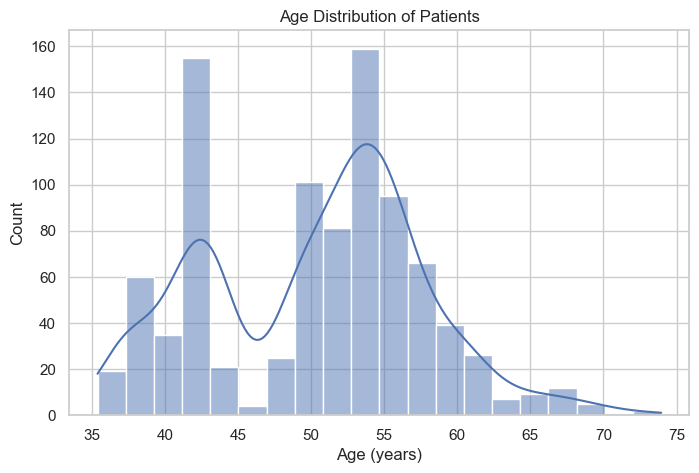

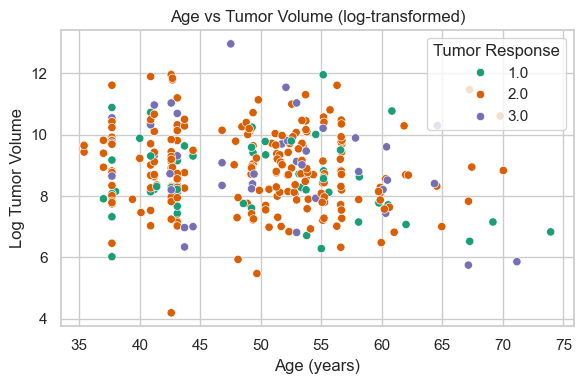

Subgroup Summary Table:
           Breast_Density_real  Volume_cu_mm_Tumor  Log Tumor Volume
Age Group                                                           
<40                      26.76             8405.20              7.87
40–50                    26.62            12819.44              8.10
50–60                    28.03             8685.69              8.01
>60                      38.31             6596.52              7.50


/var/folders/rg/xnr2j4t90f557jdc0qj9lz2m0000gn/T/ipykernel_38066/833974847.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df.groupby("Age Group")[["Breast_Density_real", "Volume_cu_mm_Tumor", "Log Tumor Volume"]].mean().round(2)


In [132]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Fix Age: convert to actual years

df["Age_years"] = df["Age"] * 10

# Create Age Group bins
df["Age Group"] = pd.cut(df["Age_years"], bins=[0, 40, 50, 60, 80], labels=["<40", "40–50", "50–60", ">60"])

# Create log-transformed tumor volume
df["Log Tumor Volume"] = np.log1p(df["Volume_cu_mm_Tumor"])

# Breast Density fix (assuming it's in decimal, convert to %)
df["Breast_Density_real"] = df["Breast Density"] * 100

# Plot: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age_years"], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

# Plot: Age vs Tumor Volume
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Age_years", y="Log Tumor Volume", hue="Tumor Response", data=df, palette="Dark2")
plt.title("Age vs Tumor Volume (log-transformed)")
plt.xlabel("Age (years)")
plt.tight_layout()
plt.show()

# Subgroup summary
summary_table = df.groupby("Age Group")[["Breast_Density_real", "Volume_cu_mm_Tumor", "Log Tumor Volume"]].mean().round(2)
print("Subgroup Summary Table:")
print(summary_table)



In [ ]:
# Check how many Patient IDs from df exist in imaging_df
matched_ids = df["Patient ID"].isin(imaging_df["Patient ID"])
print("Number of matches:", matched_ids.sum())

# Show a few IDs from each side to inspect visually
print("\ndf['Patient ID'].head():")
print(df["Patient ID"].head())

print("\nimaging_df['Patient ID'].head():")
print(imaging_df["Patient ID"].head())


Number of matches: 922

df['Patient ID'].head():
0    Breast_MRI_001
1    Breast_MRI_002
2    Breast_MRI_003
3    Breast_MRI_004
4    Breast_MRI_005
Name: Patient ID, dtype: object

imaging_df['Patient ID'].head():
0    Breast_MRI_001
1    Breast_MRI_002
2    Breast_MRI_003
3    Breast_MRI_004
4    Breast_MRI_005
Name: Patient ID, dtype: object


In [ ]:
import os

files = os.listdir("../Data/raw/")
print(files)
for file in files:
    if file.endswith((".xlsx", ".csv")):
        try:
            path = os.path.join("../Data/raw/", file)
            df_temp = pd.read_excel(path) if file.endswith(".xlsx") else pd.read_csv(path)
            for col in df_temp.columns:
                if "density" in str(col).lower():
                    print(f"\n Found in: {file}")
                    print("Column:", col)
                    print(df_temp[[col]].head())
        except Exception as e:
            print(f"Could not read {file}: {e}")


['Annotation_Boxes.xlsx', 'train_ids.csv', '.DS_Store', 'test_ids.csv', 'Clinical_and_Other_Features.xlsx', 'duke_README.txt', 'Breast_Radiologist_Density_Assessments.xlsx', 'Imaging_Features.xlsx', 'Breast-Cancer-MRI-filepath_filename-mapping.xlsx', 'segmentation_filepath_mapping.csv']

✅ Found in: Breast_Radiologist_Density_Assessments.xlsx
Column: BI‐RADS density categories           (a. Almost entirely fat                          b. Scattered fibroglandular tissue
c. Heterogeneous fibroglandular tissue
d. Extreme fibroglandular tissue)
   BI‐RADS density categories           (a. Almost entirely fat                          b. Scattered fibroglandular tissue\nc. Heterogeneous fibroglandular tissue\nd. Extreme fibroglandular tissue)
0                                                NaN                                                                                                                                                  
1                                                NaN   

In [ ]:
# # Show some ID samples from both dataframes
# print("Sample df IDs:", df["Patient ID"].unique()[:5])
# print("Sample imaging_df IDs:", imaging_df["Patient ID"].unique()[:5])

# # Count matching IDs
# matching_ids = set(df["Patient ID"]).intersection(set(imaging_df["Patient ID"]))
# print("Number of matching IDs:", len(matching_ids))


Sample df IDs: ['Breast_MRI_001' 'Breast_MRI_002' 'Breast_MRI_003' 'Breast_MRI_004'
 'Breast_MRI_005']
Sample imaging_df IDs: ['Breast_MRI_001' 'Breast_MRI_002' 'Breast_MRI_003' 'Breast_MRI_004'
 'Breast_MRI_005']
Number of matching IDs: 922


In [136]:
# Merge breastDensity_T1 if not already present
if "Breast Density" not in df.columns:
    df = df.merge(imaging_df[["Patient ID", "breastDensity_T1"]], on="Patient ID", how="left")
    df.rename(columns={"breastDensity_T1": "Breast Density"}, inplace=True)

# Drop duplicate "Breast Density" columns, if any
breast_density_cols = [col for col in df.columns if col == "Breast Density"]
if len(breast_density_cols) > 1:
    df = df.loc[:, ~df.columns.duplicated()]

# Confirm it's fixed
if "Breast Density" in df.columns:
    print(df[["Patient ID", "Breast Density"]].head())
else:
    print("Breast Density column still missing.")


       Patient ID  Breast Density
0  Breast_MRI_001        0.456428
1  Breast_MRI_002        0.491393
2  Breast_MRI_003        0.256082
3  Breast_MRI_004        0.127007
4  Breast_MRI_005        0.202973


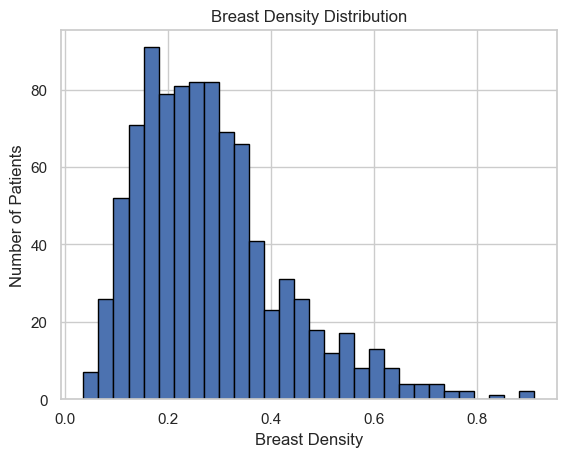

In [137]:
import matplotlib.pyplot as plt

plt.hist(df["Breast Density"], bins=30, edgecolor="black")
plt.title("Breast Density Distribution")
plt.xlabel("Breast Density")
plt.ylabel("Number of Patients")
plt.show()


In [ ]:
print(df["Breast Density"].describe())

count    922.000000
mean       0.283422
std        0.142337
min        0.035871
25%        0.176911
50%        0.260727
75%        0.349657
max        0.911451
Name: Breast Density, dtype: float64


In [139]:
df["Near Complete Response"].value_counts()

Near Complete Response
0.0    207
1.0     64
2.0     29
3.0     12
Name: count, dtype: int64

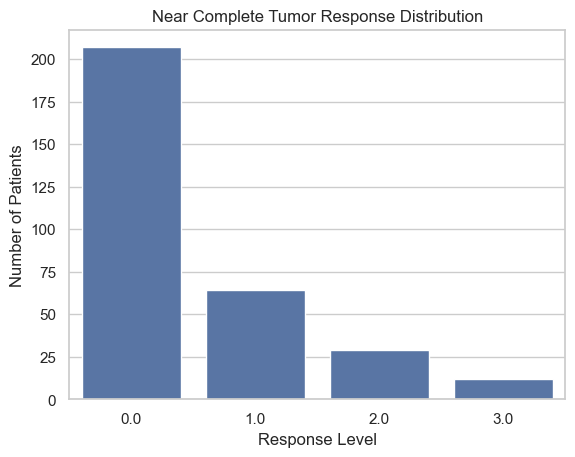

In [140]:
sns.countplot(x="Near Complete Response", data=df)
plt.title("Near Complete Tumor Response Distribution")
plt.xlabel("Response Level")
plt.ylabel("Number of Patients")
plt.show()

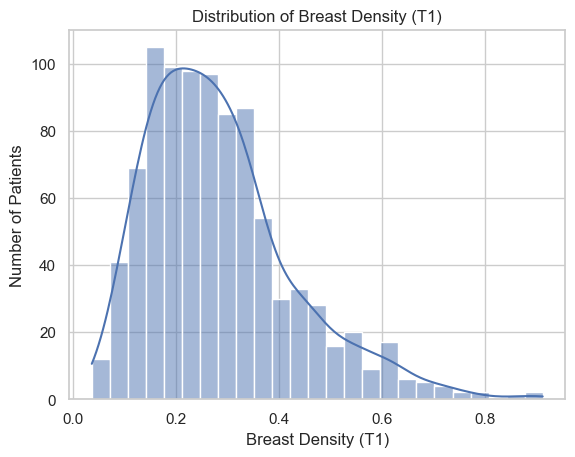

In [141]:
sns.histplot(df["Breast Density"], kde=True)
plt.title("Distribution of Breast Density (T1)")
plt.xlabel("Breast Density (T1)")
plt.ylabel("Number of Patients")
plt.show()


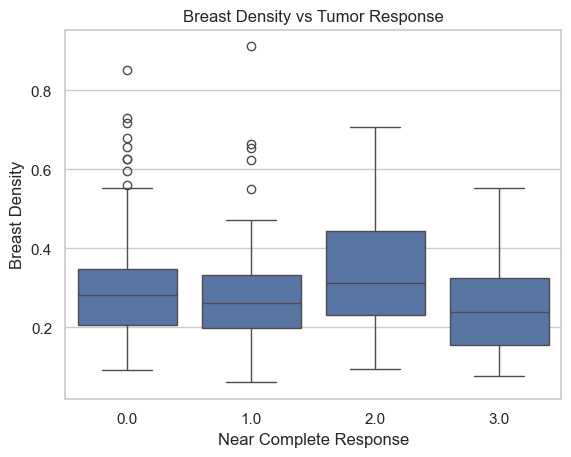

In [142]:
sns.boxplot(x="Near Complete Response", y="Breast Density", data=df)
plt.title("Breast Density vs Tumor Response")
plt.xlabel("Near Complete Response")
plt.ylabel("Breast Density")
plt.show()


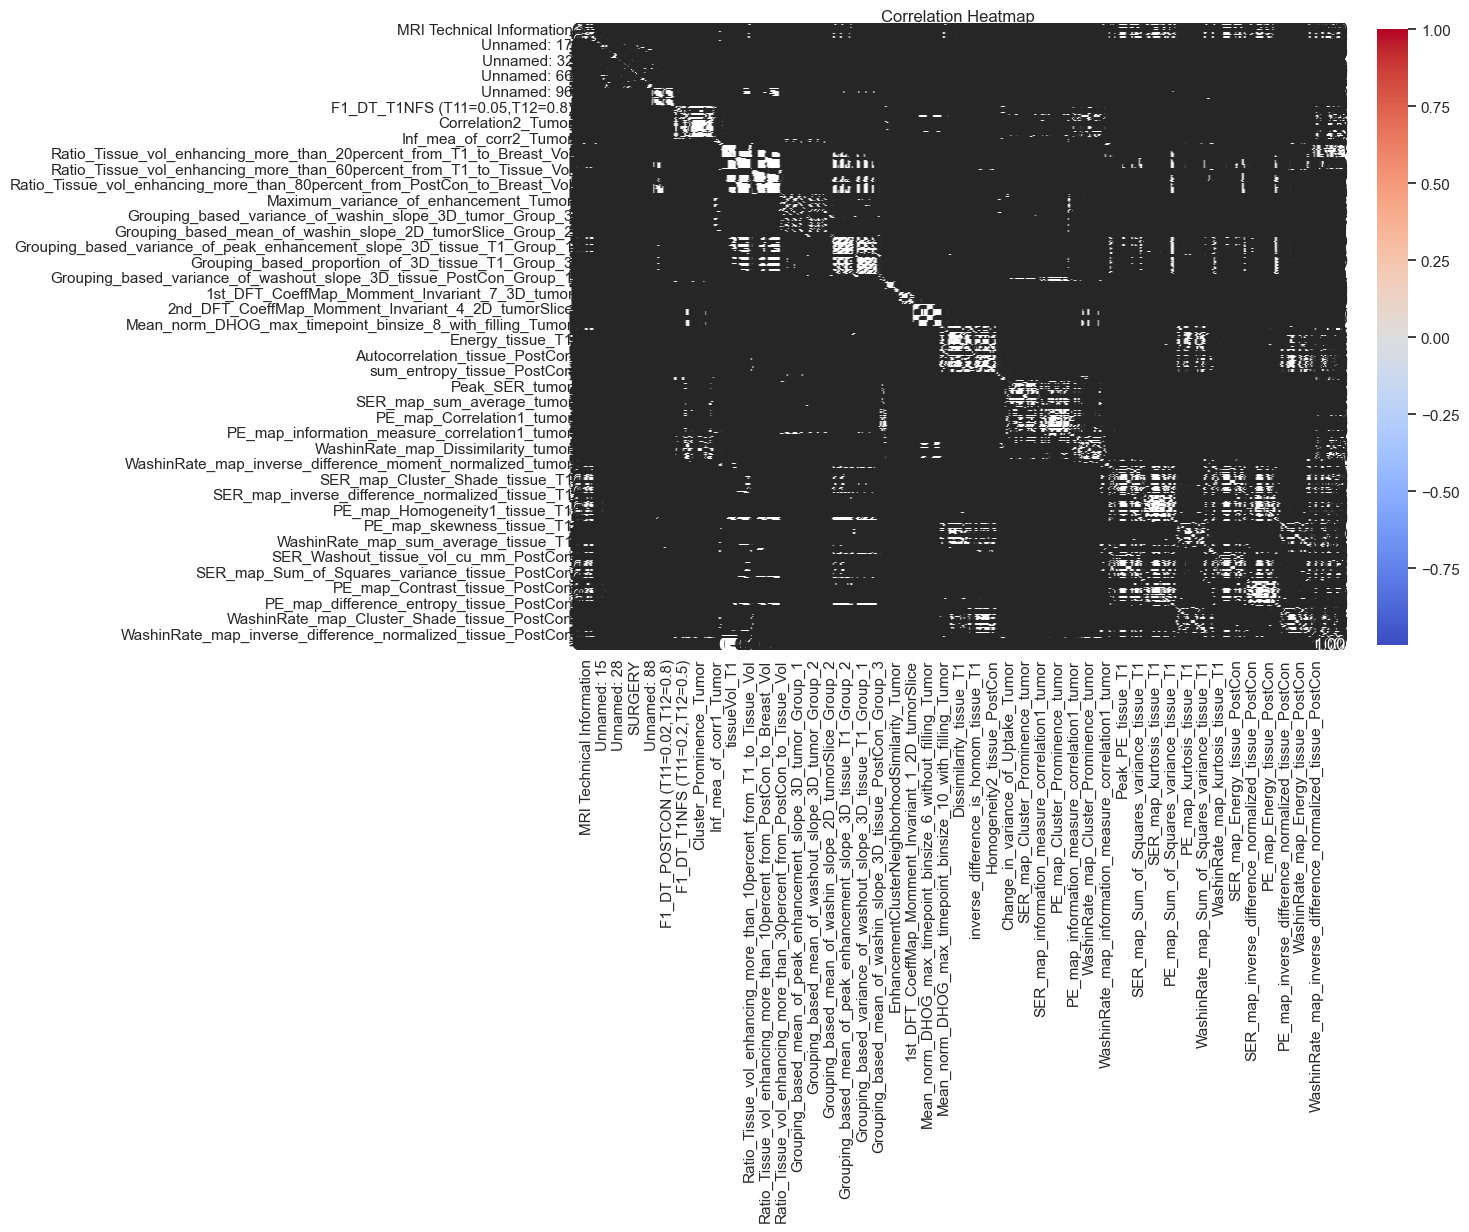

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


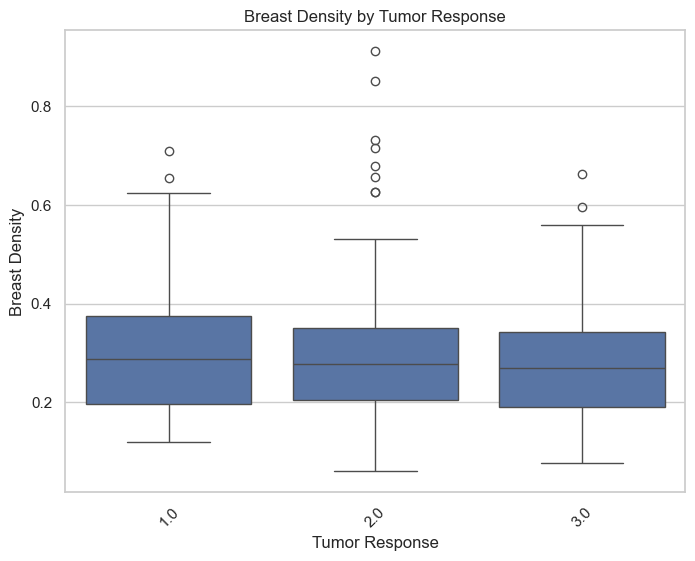

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="Tumor Response", y="Breast Density", data=df)
plt.title("Breast Density by Tumor Response")
plt.xticks(rotation=45)
plt.show()


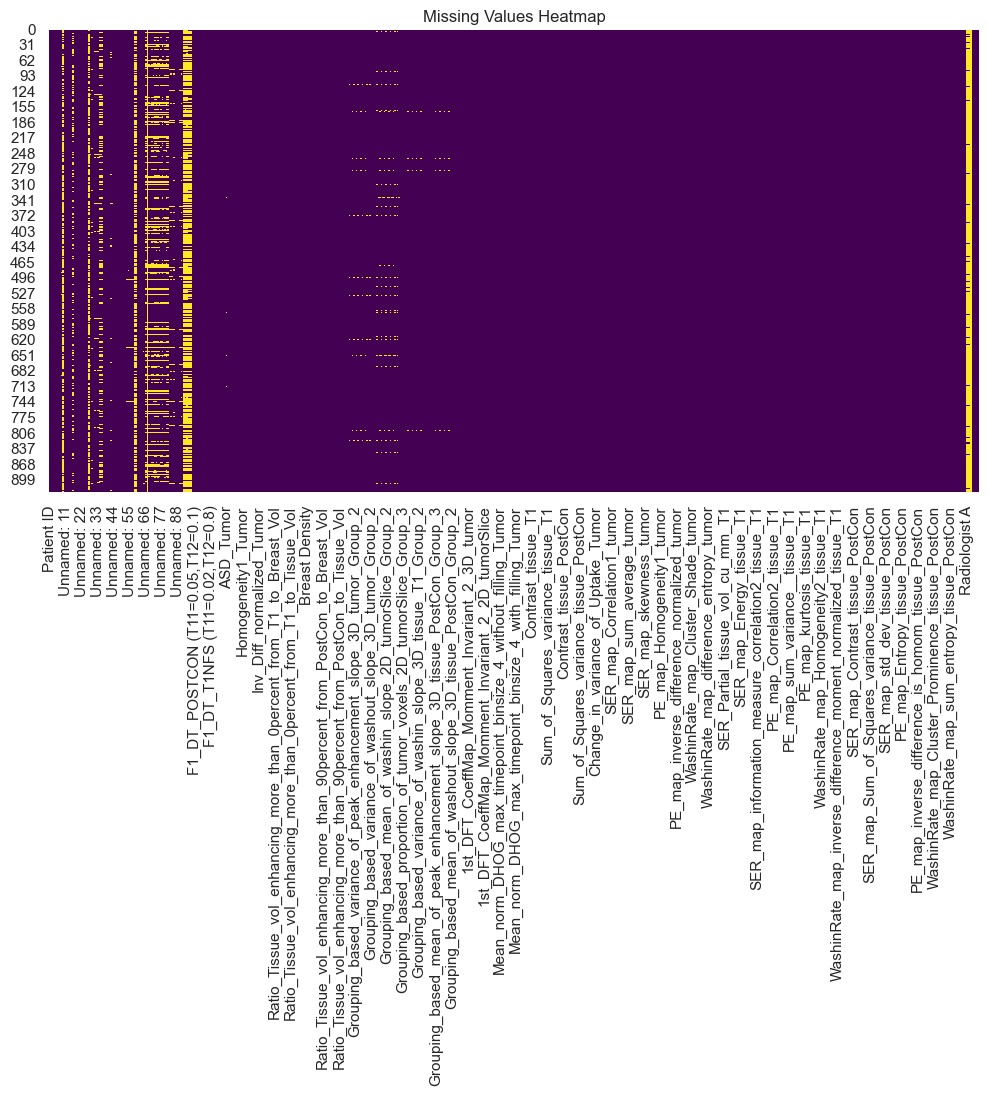

In [145]:
#Missing value heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


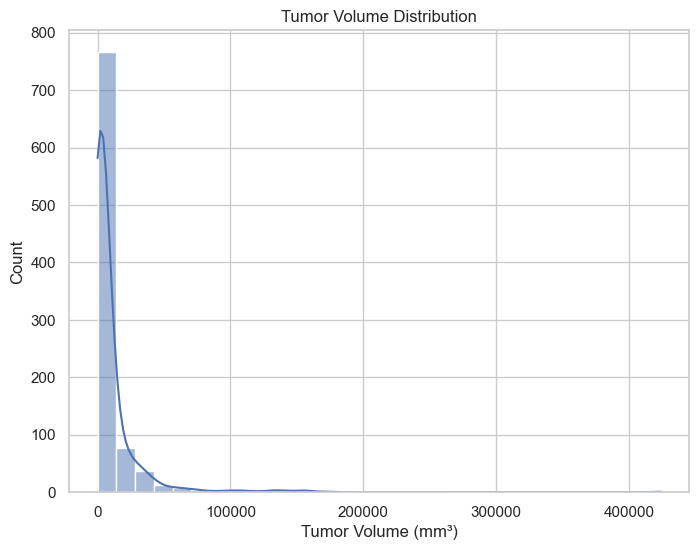

In [146]:
[col for col in df.columns if "volume" in col.lower()]
plt.figure(figsize=(8, 6))
sns.histplot(df["Volume_cu_mm_Tumor"].dropna(), bins=30, kde=True)
plt.title("Tumor Volume Distribution")
plt.xlabel("Tumor Volume (mm³)")
plt.ylabel("Count")
plt.show()


In [147]:
[col for col in df.columns if "volume" in col.lower()]
[col for col in df.columns if "response" in col.lower()]


['Tumor Response',
 'Pathologic Response to Neoadjuvant Therapy',
 'Near Complete Response']

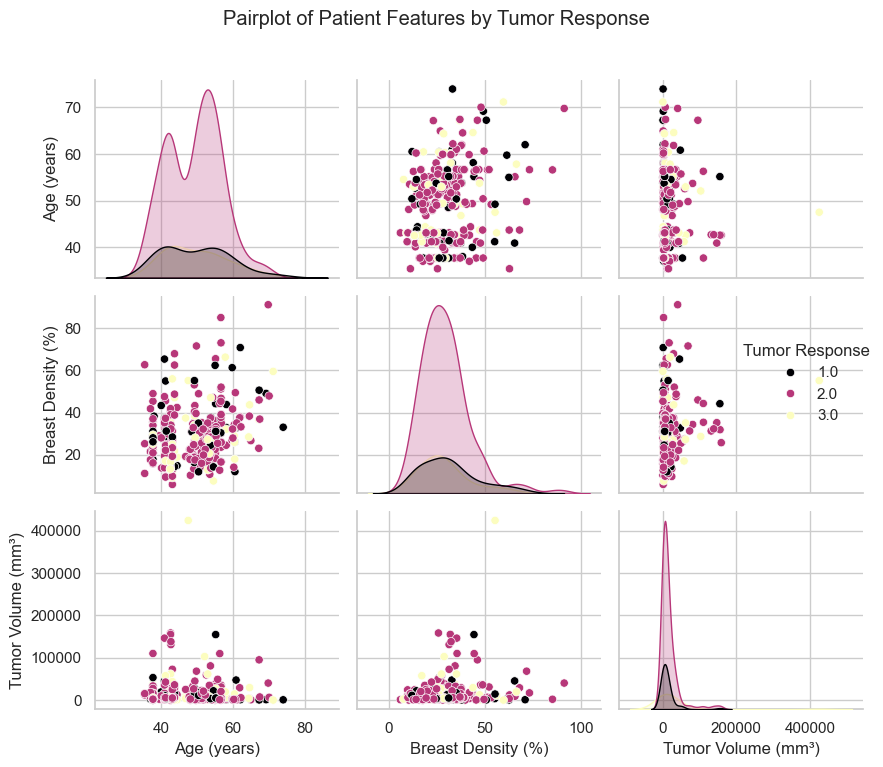

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select corrected columns
plot_df = df[["Age_years", "Breast_Density_real", "Volume_cu_mm_Tumor", "Tumor Response"]].dropna()

# Rename for clarity in plots
plot_df.rename(columns={
    "Age_years": "Age (years)",
    "Breast_Density_real": "Breast Density (%)",
    "Volume_cu_mm_Tumor": "Tumor Volume (mm³)"
}, inplace=True)

# Plot
sns.pairplot(plot_df, hue="Tumor Response", palette="magma", diag_kind="kde")
plt.suptitle("Pairplot of Patient Features by Tumor Response", y=1.02)
plt.tight_layout()
plt.show()


/var/folders/rg/xnr2j4t90f557jdc0qj9lz2m0000gn/T/ipykernel_38066/854599468.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tumor Response", data=df, palette="Set2")


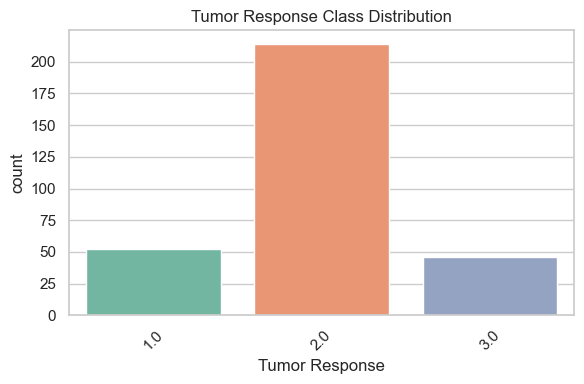

/var/folders/rg/xnr2j4t90f557jdc0qj9lz2m0000gn/T/ipykernel_38066/854599468.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tumor Response", y="Log Tumor Volume", data=df, palette="Set3")


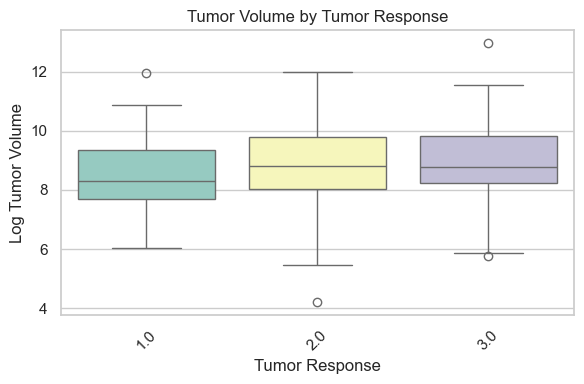

/var/folders/rg/xnr2j4t90f557jdc0qj9lz2m0000gn/T/ipykernel_38066/854599468.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age Group", y="Breast_Density_real", data=plot_df, palette="Set2")


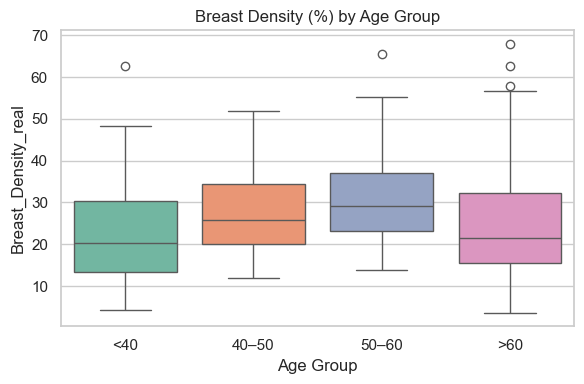

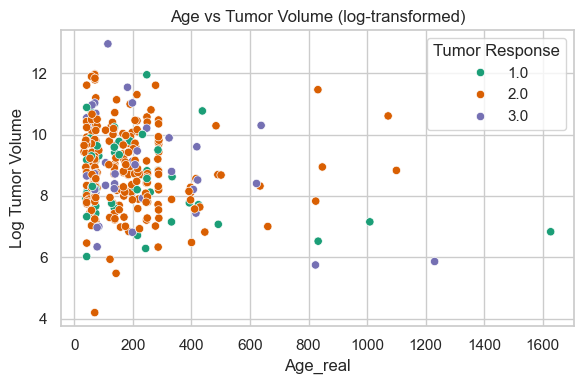

Subgroup Summary Table:
            Breast_Density_real  Volume_cu_mm_Tumor  Log Tumor Volume
Age Group                                                           
<40                      23.80             5722.11              7.83
40–50                    27.36             9147.14              7.82
50–60                    30.91            15418.84              8.33
>60                      24.84            12280.62              8.18


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reverse log1p transformation on Age
df["Age_real"] = np.expm1(df["Age"]) 

# Scale breast density to percentage
df["Breast_Density_real"] = df["Breast Density"] * 100

# Log transform tumor volume
df["Log Tumor Volume"] = np.log1p(df["Volume_cu_mm_Tumor"])

# Create age groups based on corrected age
df["Age Group"] = pd.cut(df["Age_real"], bins=[20, 40, 50, 60, 80],labels=["<40", "40–50", "50–60", ">60"])

# Plot 1: Tumor Response Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Tumor Response", data=df, palette="Set2")
plt.title("Tumor Response Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Tumor Volume by Tumor Response
plt.figure(figsize=(6, 4))
sns.boxplot(x="Tumor Response", y="Log Tumor Volume", data=df, palette="Set3")
plt.title("Tumor Volume by Tumor Response")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Breast Density (%) by Age Group
plot_df = df[["Age Group", "Breast_Density_real"]].dropna()
plt.figure(figsize=(6, 4))
sns.boxplot(x="Age Group", y="Breast_Density_real", data=plot_df, palette="Set2")
plt.title("Breast Density (%) by Age Group")
plt.tight_layout()
plt.show()

# Plot 4: Age vs Tumor Volume (log)
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Age_real", y="Log Tumor Volume", hue="Tumor Response", data=df, palette="Dark2")
plt.title("Age vs Tumor Volume (log-transformed)")
plt.tight_layout()
plt.show()

# Subgroup Summary Table
summary_table = df.groupby("Age Group",observed=False)[["Breast_Density_real", "Volume_cu_mm_Tumor", "Log Tumor Volume"]].mean().round(2)
print("Subgroup Summary Table:\n", summary_table)
